In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset("iris")

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


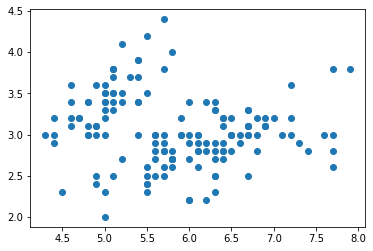

In [5]:
plt.scatter(data["sepal_length"],data["sepal_width"])

In [6]:
data.describe().T[["min","max"]]

,min,max
sepal_length,4.3,7.9
sepal_width,2.0,4.4
petal_length,1.0,6.9
petal_width,0.1,2.5


In [7]:
ready_data=np.array([data["sepal_length"],data["sepal_width"]]).T

## initial K means

In [123]:
def k_means(data,k):

        s_len=np.random.uniform(4.3, 7.9,k)
        s_wid=np.random.uniform(2.0, 4.4,k)
        clusters=np.array([s_len,s_wid]).T
        c=[]
        cdata=dict()
        old=np.zeros(clusters.shape) 
        while(abs(np.sum(old-clusters))>1):
            old=clusters
            for i in range(len(data)):
                c.append(np.argmin(np.sum(abs(clusters-data[i]),axis=1)))
                cdata[c[-1]]=data[i]
                
            for i in range(k):
                if len(cdata)>i :
                    if len(cdata[i])>0:
                        cdata[i]=np.array(cdata[i])
                else:
                    break
            for i in range(k):
                if len(cdata)>i:
                    clusters[i]=np.sum(cdata[i],axis=0)/len(cdata[i])

        return clusters , c
    

In [124]:
clusters,labels=k_means(ready_data,20)

In [125]:
ready_data.shape

(150, 2)

# bad result

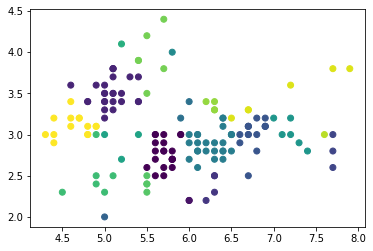

In [126]:
plt.scatter(ready_data[:,0],ready_data[:,1],c=labels)

# k means with best initial centroids

# 

In [155]:
def best_k_means(data,k):
    j=0
    jlist=[]
    dict_of_loop={
        "dest_no":[],
        "dest_value":[],
        "clusters":[],
        "labels":[]
    }
    
    for best in range(100):
        summ=0
        
        cl=[]
        for i in range(data.shape[1]):
            cl.append(np.random.uniform(data[:,i].min(), data[:,i].max(),k))

        clusters=np.array(cl).T
        c=[]
        cdata=dict()
        for i in range(k):
            cdata[i]=[]
        old=np.zeros(clusters.shape)
        
        while(abs(np.sum(old-clusters))>1):
            old=clusters
            for i in range(len(data)):
                c.append(np.argmin(np.sum(abs(clusters-data[i]),axis=1)))
                cdata[c[-1]].append(data[i])
                
            for i in range(k):
                if len(cdata)>i:
                    if len(cdata[i])>0:
                        cdata[i]=np.array(cdata[i])
            for i in range(k):
                if len(cdata)>i :
                    if len(cdata[i])>0:
                        clusters[i]=np.sum(cdata[i],axis=0)/len(cdata[i])
                
        #save values
        dict_of_loop["dest_no"].append(best)
        dict_of_loop["clusters"].append(clusters)
        dict_of_loop["labels"].append(c)
        
        for i in range(k):
            if len(cdata)>i:
                if len(cdata[i])>0:
                    summ=summ+np.sum((cdata[i]-clusters[i])**2)
            
        j=summ/len(data)
        dict_of_loop["dest_value"].append(j)
        jlist.append(j)
    
    bestj=jlist.index(min(jlist))
    return jlist , bestj , dict_of_loop , min(jlist)
    

In [156]:
list_loss,bestj,dict1,best=best_k_means(ready_data,3)

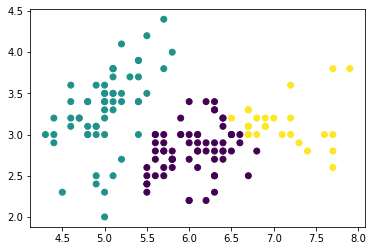

In [157]:
plt.scatter(ready_data[:,0],ready_data[:,1],c=dict1["labels"][bestj])

In [158]:
bestj

50

In [159]:
min(dict1["dest_value"])

0.25874404276684976

In [160]:
dict1["dest_value"][bestj]

0.25874404276684976

In [161]:
dict1["clusters"][bestj]

array([[6.05151515, 2.80757576],
       [5.01403509, 3.3122807 ],
       [7.08518519, 3.12962963]])

# Elbow method

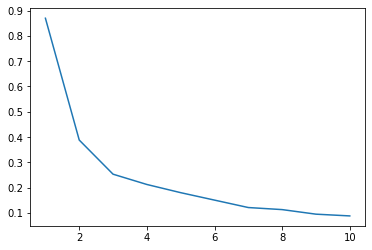

In [162]:
k=np.linspace(1,10,10)
n=[]
for i in range(1,11):
    list_loss,bestj,dict1,best=best_k_means(ready_data,i)
    n.append(best)
 
plt.plot(k,n)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

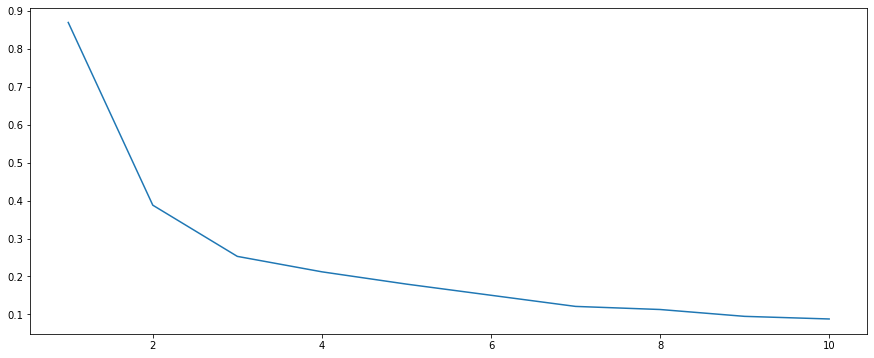

In [164]:
plt.figure(figsize=(15,6))
plt.plot(k,n)
k

In [214]:
list_loss,bestj,dict1,best=best_k_means(ready_data,10)
best

0.09800964340120256

# 

#### I will add comments and the documentation later because I don't have any time now. So, download this notebook again after a while.